In [1]:
import numpy as np
import pandas as pd 
import re
import joblib 
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.metrics as mt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import (
    export_graphviz,
    DecisionTreeClassifier,
    DecisionTreeRegressor
    )
    ## check


from sklearn.ensemble import(
    RandomForestClassifier, ## check
    VotingClassifier,
    GradientBoostingClassifier,
    RandomForestRegressor
    )
from sklearn.metrics import(
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay, 
    recall_score,
    precision_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score
    )     ##check
from sklearn.model_selection import (
    train_test_split,
    KFold ,
    StratifiedShuffleSplit,  ## check
    cross_val_score,     ##check
    RandomizedSearchCV
    )


C:\Users\siim2\AppData\Local\Temp\ipykernel_10152\1062761202.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
keywords = ["auto","construct","capital_market","chemicals","equipment",
            "transport","semi","bank","steel",
            "telecom","staples","discretionary","kospi"]

In [3]:
dfs = {}  # 빈 딕셔너리 생성
column_names_per_keyword = {}

# 각 키워드에 해당하는 데이터프레임을 dfs 딕셔너리에 추가
for keyword in keywords:
    dfs[keyword] = pd.read_excel(r"total_raw_0.3ver_60.xlsx", sheet_name=keyword, header=0, index_col=0)
    column_names_per_keyword[keyword] = dfs[keyword].columns.tolist()

    print(f"Compile {keyword}")

# 각 데이터프레임의 인덱스를 날짜 형식으로 변환한 후 문자열로 변경
for keyword, df in dfs.items():
    df.index = pd.to_datetime(df.index)
    df.index = df.index.strftime('%Y-%m-%d')

# 첫 2개 행을 출력
for keyword, df in dfs.items():
    print(f"Top 2 rows of {keyword}:")
    print(df.head(2))
    print(column_names_per_keyword[keyword])

# 첫 번째 데이터프레임의 인덱스를 df_index에 복사하여 초기화
df_index_auto = list(dfs.values())[0]
df_index_construct = list(dfs.values())[1]
df_index_capital_market = list(dfs.values())[2]
df_index_chemicals = list(dfs.values())[3]
df_index_equipment = list(dfs.values())[4]
df_index_transport = list(dfs.values())[5]
df_index_semi = list(dfs.values())[6]
df_index_bank = list(dfs.values())[7]
df_index_steel = list(dfs.values())[8]
df_index_telecom = list(dfs.values())[9]
df_index_staples = list(dfs.values())[10]
df_index_discretionary = list(dfs.values())[11]
df_index_kospi = list(dfs.values())[12]


Compile auto
Compile construct
Compile capital_market
Compile chemicals
Compile equipment
Compile transport
Compile semi
Compile bank
Compile steel
Compile telecom
Compile staples
Compile discretionary
Compile kospi
Top 2 rows of auto:
             auto    WTI  DGS2  DGS10  TIPS    VIX    PPI    per    pbr  \
date                                                                      
2010-04-01  S_buy  84.53  1.05   3.89  1.61  17.47  172.2  24.13  24.13   
2010-04-05  S_buy  86.36  1.18   4.01  1.70  17.02  172.2  24.22  24.22   

               원달러  ...   구리선물_60  중국고정자산투자(yoy%)_60  중국 PMI_60   금 선물_60  \
date                ...                                                     
2010-04-01  1131.3  ...  0.000842          -0.003191  -0.001859 -0.000108   
2010-04-05  1126.0  ...  0.001063          -0.003258  -0.001785 -0.000062   

            달러 인덱스_60  중국 소매판매_60  중국 산업 생산_60  MSCI_EMER_60  US_auto_60  \
date                                                                       
20

In [4]:
# 각 데이터프레임의 열 이름 출력
for keyword, column_names in column_names_per_keyword.items():
    print(f"Column names for {keyword}: {column_names}")


Column names for auto: ['auto', 'WTI', 'DGS2', 'DGS10', 'TIPS', 'VIX', 'PPI', 'per', 'pbr', '원달러', '원엔', '3년물 ', '10년물 ', 'treasury_10_3_diff', 'T10Y2Y', 'usa_cpi', 'us_e_infla', 'yield_gap(%)', 'cpi', 'export', '구리선물', '중국고정자산투자(yoy%)', '중국 PMI', '금 선물', '달러 인덱스', '중국 소매판매', '중국 산업 생산', 'MSCI_EMER', 'US_auto', 'export_auto', 'WTI_20', 'DGS2_20', 'DGS10_20', 'TIPS_20', 'VIX_20', 'PPI_20', 'per_20', 'pbr_20', '원달러_20', '원엔_20', '3년물 _20', '10년물 _20', 'treasury_10_3_diff_20', 'T10Y2Y_20', 'usa_cpi_20', 'us_e_infla_20', 'yield_gap(%)_20', 'cpi_20', 'export_20', '구리선물_20', '중국고정자산투자(yoy%)_20', '중국 PMI_20', '금 선물_20', '달러 인덱스_20', '중국 소매판매_20', '중국 산업 생산_20', 'MSCI_EMER_20', 'US_auto_20', 'export_auto_20', 'WTI_60', 'DGS2_60', 'DGS10_60', 'TIPS_60', 'VIX_60', 'PPI_60', 'per_60', 'pbr_60', '원달러_60', '원엔_60', '3년물 _60', '10년물 _60', 'treasury_10_3_diff_60', 'T10Y2Y_60', 'usa_cpi_60', 'us_e_infla_60', 'yield_gap(%)_60', 'cpi_60', 'export_60', '구리선물_60', '중국고정자산투자(yoy%)_60', '중국 PMI_60', '금 선물_6

In [5]:
print(len(df_index_kospi.columns))
print(len(df_index_discretionary.columns))


82
88


In [6]:
# 첫 2개 행을 출력
for keyword, df in dfs.items():
    print(f"Top 2 rows of {keyword}:")
    print(df.head(2))
    print(f"Column names for {keyword}: {column_names_per_keyword[keyword]}")


Top 2 rows of auto:
             auto    WTI  DGS2  DGS10  TIPS    VIX    PPI    per    pbr  \
date                                                                      
2010-04-01  S_buy  84.53  1.05   3.89  1.61  17.47  172.2  24.13  24.13   
2010-04-05  S_buy  86.36  1.18   4.01  1.70  17.02  172.2  24.22  24.22   

               원달러  ...   구리선물_60  중국고정자산투자(yoy%)_60  중국 PMI_60   금 선물_60  \
date                ...                                                     
2010-04-01  1131.3  ...  0.000842          -0.003191  -0.001859 -0.000108   
2010-04-05  1126.0  ...  0.001063          -0.003258  -0.001785 -0.000062   

            달러 인덱스_60  중국 소매판매_60  중국 산업 생산_60  MSCI_EMER_60  US_auto_60  \
date                                                                       
2010-04-01   0.000870    0.006153    -0.007687      0.000181   -0.001737   
2010-04-05   0.000855    0.006087    -0.007304      0.000369   -0.001560   

            export_auto_60  
date                        
2010-04

In [7]:
df_index_telecom.head(2)

,telecom,WTI,DGS2,DGS10,TIPS,VIX,PPI,per,pbr,원달러,...,구리선물_60,중국고정자산투자(yoy%)_60,중국 PMI_60,금 선물_60,달러 인덱스_60,중국 소매판매_60,중국 산업 생산_60,MSCI_EMER_60,통신배당_60,IT산업별/월별 수출 현황 중 통신기기 소계_60
date,,,,,,,,,,,,,,,,,,,,,
2010-04-01,sell,84.53,1.05,3.89,1.61,17.47,172.2,24.13,24.13,1131.3,...,0.000842,-0.003191,-0.001859,-0.000108,0.000870,0.006153,-0.007687,0.000181,0.002829,-0.001122
2010-04-05,sell,86.36,1.18,4.01,1.70,17.02,172.2,24.22,24.22,1126.0,...,0.001063,-0.003258,-0.001785,-0.000062,0.000855,0.006087,-0.007304,0.000369,0.002899,-0.000808


In [8]:
for keyword, df in dfs.items():
    df.head(2).info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 2010-04-01 to 2010-04-05
Data columns (total 88 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   auto                   2 non-null      object 
 1   WTI                    2 non-null      float64
 2   DGS2                   2 non-null      float64
 3   DGS10                  2 non-null      float64
 4   TIPS                   2 non-null      float64
 5   VIX                    2 non-null      float64
 6   PPI                    2 non-null      float64
 7   per                    2 non-null      float64
 8   pbr                    2 non-null      float64
 9   원달러                    2 non-null      float64
 10  원엔                     2 non-null      float64
 11  3년물                    2 non-null      float64
 12  10년물                   2 non-null      float64
 13  treasury_10_3_diff     2 non-null      float64
 14  T10Y2Y                 2 non-null      float64
 1

In [9]:
data_splits = {}
for keyword, df_index in dfs.items():
    df_dropna = df_index.dropna()  # 결측치가 있는 행 제거
    
    if df_dropna.empty:
        print(f"Error: Dataframe for {keyword} is empty.")
    else:
        # 종속 변수(y) 및 독립 변수(X) 설정
        y_keyword = df_dropna[keyword]  # 현재 키워드에 해당하는 종속 변수
        X_keyword = df_dropna.drop(columns=[keyword])  # 현재 키워드를 제외한 나머지 열은 독립 변수로 사용

        # 데이터 분할
        X_train, X_test, y_train, y_test = train_test_split(X_keyword, y_keyword, test_size=0.2, random_state=0)
        
        # 데이터 정규화
        normalizer = StandardScaler()
        X_train_normalized = normalizer.fit_transform(X_train)
        X_test_normalized = normalizer.transform(X_test)

        # 데이터 저장
        data_splits[keyword] = {
            'X_train': X_train_normalized,
            'X_test': X_test_normalized,
            'y_train': y_train,
            'y_test': y_test
        }

        print(f'Train set dimension for {keyword} is {X_train_normalized.shape}')
        print(f'Test set dimension for {keyword} is {X_test_normalized.shape}')
        # 훈련 데이터와 테스트 데이터의 클래스 비율 확인
        train_class_counts = {label: sum(y_train == label) for label in set(y_keyword)}
        test_class_counts = {label: sum(y_test == label) for label in set(y_keyword)}

        print(f"훈련 데이터 클래스 비율 for {keyword}:", train_class_counts)
        print(f"테스트 데이터 클래스 비율 for {keyword}:", test_class_counts)

Train set dimension for auto is (2608, 87)
Test set dimension for auto is (652, 87)
훈련 데이터 클래스 비율 for auto: {'S_buy': 872, 'sell': 1292, 'buy': 444}
테스트 데이터 클래스 비율 for auto: {'S_buy': 209, 'sell': 322, 'buy': 121}
Train set dimension for construct is (2607, 87)
Test set dimension for construct is (652, 87)
훈련 데이터 클래스 비율 for construct: {'S_buy': 926, 'sell': 1354, 'buy': 327}
테스트 데이터 클래스 비율 for construct: {'S_buy': 223, 'sell': 349, 'buy': 80}
Train set dimension for capital_market is (2608, 87)
Test set dimension for capital_market is (652, 87)
훈련 데이터 클래스 비율 for capital_market: {'S_buy': 951, 'sell': 1335, 'buy': 322}
테스트 데이터 클래스 비율 for capital_market: {'S_buy': 220, 'sell': 338, 'buy': 94}
Train set dimension for chemicals is (2608, 87)
Test set dimension for chemicals is (652, 87)
훈련 데이터 클래스 비율 for chemicals: {'S_buy': 1008, 'sell': 1249, 'buy': 351}
테스트 데이터 클래스 비율 for chemicals: {'S_buy': 233, 'sell': 333, 'buy': 86}
Train set dimension for equipment is (2608, 87)
Test set dimension

### 여러가지 실험을 했다
1. logistic_regression
2. random_forest
3. gradient_boosting
4. svm
5. neural_network

In [10]:
# accuracies = {}

# # 각 키워드에 대한 분류기 및 Voting Classifier 생성
# for keyword, data_split in data_splits.items():
#     X_train = data_split['X_train']
#     X_test = data_split['X_test']
#     y_train = data_split['y_train']
#     y_test = data_split['y_test']
    
#     random_forest = RandomForestClassifier()
#     gradient_boosting = GradientBoostingClassifier()
#     svm = SVC()
#     knn = KNeighborsClassifier()
#     decision_tree = DecisionTreeClassifier()

#     # Voting Classifier 생성
#     voting_classifier = VotingClassifier(
#         estimators=[
#             ('rf', random_forest), 
#             ('gb', gradient_boosting), 
#             ('svm', svm), 
#             ('knn', knn),
#             ('dt', decision_tree)
#         ],
#         voting='hard'
#     )

#     models = {
#         'Random Forest': random_forest,
#         'Gradient Boosting': gradient_boosting,
#         'Support Vector Machine': svm,
#         'K-Nearest Neighbors': knn,
#         'Decision Tree': decision_tree,
#         'Voting Classifier': voting_classifier
#     }

#     # 각 분류기에 대해 학습하고 평가
#     for name, model in models.items():
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         accuracy = accuracy_score(y_test, y_pred)
#         accuracies[f'{keyword}_{name}'] = accuracy
#         print(f"{keyword} 키워드로 학습한 {name}의 정확도: {accuracy}")

#     # 가장 높은 정확도를 가진 모델 찾기
#     best_model_name = max(accuracies, key=accuracies.get)
#     best_accuracy = accuracies[best_model_name]

#     print(f"최고의 성능을 보인 모델은 {best_model_name}로, 정확도는 {best_accuracy:.3f}입니다.")

In [11]:
# 각 키워드에 대한 최고 성능 모델과 정확도를 저장할 딕셔너리
best_models = {}
best_accuracies = {}

# 각 키워드에 대한 분류기 및 Voting Classifier 생성
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    X_test = data_split['X_test']
    y_train = data_split['y_train']
    y_test = data_split['y_test']
    
    accuracies = {}  # 키워드마다 새로운 accuracies 딕셔너리 생성

    random_forest = RandomForestClassifier()
    gradient_boosting = GradientBoostingClassifier()
    svm = SVC()
    knn = KNeighborsClassifier()
    decision_tree = DecisionTreeClassifier()

    # Voting Classifier 생성
    voting_classifier = VotingClassifier(
        estimators=[
            ('rf', random_forest), 
            ('gb', gradient_boosting), 
            ('svm', svm), 
            ('knn', knn),
            ('dt', decision_tree)
        ],
        voting='hard'
    )

    models = {
        'Random Forest': random_forest,
        'Gradient Boosting': gradient_boosting,
        'Support Vector Machine': svm,
        'K-Nearest Neighbors': knn,
        'Decision Tree': decision_tree,
        'Voting Classifier': voting_classifier
    }

    # 각 분류기에 대해 학습하고 평가
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[name] = accuracy

    # 가장 높은 정확도를 가진 모델 찾기
    best_model_name = max(accuracies, key=accuracies.get)
    best_accuracy = accuracies[best_model_name]
    
    # 최고 성능 모델과 정확도를 저장
    best_models[keyword] = best_model_name
    best_accuracies[keyword] = best_accuracy
    print(f"{keyword}에서 최고의 성능을 보인 모델은 {best_model_name}로, 정확도는 {best_accuracy:.3f}입니다.")

def print_best_model(keyword):
    best_model_name = best_models.get(keyword)
    if best_model_name:
        accuracy = best_accuracies.get(keyword)

# 각 키워드별 최고 성능의 모델 출력
for keyword in data_splits.keys():
    print_best_model(keyword)


auto에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.891입니다.
construct에서 최고의 성능을 보인 모델은 K-Nearest Neighbors로, 정확도는 0.874입니다.
capital_market에서 최고의 성능을 보인 모델은 Voting Classifier로, 정확도는 0.905입니다.
chemicals에서 최고의 성능을 보인 모델은 Voting Classifier로, 정확도는 0.896입니다.
equipment에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.877입니다.
transport에서 최고의 성능을 보인 모델은 Voting Classifier로, 정확도는 0.891입니다.
semi에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.882입니다.
bank에서 최고의 성능을 보인 모델은 K-Nearest Neighbors로, 정확도는 0.887입니다.
steel에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.896입니다.
telecom에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.890입니다.
staples에서 최고의 성능을 보인 모델은 Voting Classifier로, 정확도는 0.903입니다.
discretionary에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.883입니다.
kospi에서 최고의 성능을 보인 모델은 Voting Classifier로, 정확도는 0.896입니다.


### 최고의 성능 대부분은 Random Forest 모델로, 정확도는 대부분 0.8 이상 


### 따라서 randomforest 로 진행

### 그러면은 렌덤 포레스트 단순 모델링을 해보자

In [12]:
# Train set 및 Test set에 대한 성능을 저장할 딕셔너리 생성
performance_results = {}

# Random Forest 모델 생성
rfc = RandomForestClassifier()

# 각 키워드에 대해 모델을 학습하고 Train set 및 Test set에 대한 성능을 측정
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']
    X_test = data_split['X_test']
    y_test = data_split['y_test']
    
    # 모델 학습
    rfc.fit(X_train, y_train)

    # Train set에 대한 성능 측정
    y_pred_train = rfc.predict(X_train)
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)

    # Test set에 대한 성능 측정
    y_pred_test = rfc.predict(X_test)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    # 결과 저장
    performance_results[keyword] = {
        'Train 성능': acc_train,
        'Test 성능': acc_test
    }

# 각 키워드에 대한 Train set 및 Test set의 성능 출력
for keyword, performance in performance_results.items():
    print(f"{keyword} 키워드에 대한 성능: ",performance['Test 성능'])
    print()

auto 키워드에 대한 성능:  0.8880368098159509

construct 키워드에 대한 성능:  0.8696319018404908

capital_market 키워드에 대한 성능:  0.8987730061349694

chemicals 키워드에 대한 성능:  0.897239263803681

equipment 키워드에 대한 성능:  0.8665644171779141

transport 키워드에 대한 성능:  0.8849693251533742

semi 키워드에 대한 성능:  0.8803680981595092

bank 키워드에 대한 성능:  0.8849693251533742

steel 키워드에 대한 성능:  0.8895705521472392

telecom 키워드에 대한 성능:  0.8895705521472392

staples 키워드에 대한 성능:  0.9033742331288344

discretionary 키워드에 대한 성능:  0.8941717791411042

kospi 키워드에 대한 성능:  0.8957055214723927



### test set에 대해서 성능이 한 80~87%정도 나온다 약간 상승!

### 이러면 조금더 스케일링을 해서 정확도를 높이는 작업을 진행하자

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


auto 키워드에 대한 최적의 트리 수는 19, 최적의 깊이는 19 입니다.
construct 키워드에 대한 최적의 트리 수는 20, 최적의 깊이는 15 입니다.
capital_market 키워드에 대한 최적의 트리 수는 9, 최적의 깊이는 19 입니다.
chemicals 키워드에 대한 최적의 트리 수는 12, 최적의 깊이는 19 입니다.
equipment 키워드에 대한 최적의 트리 수는 12, 최적의 깊이는 20 입니다.
transport 키워드에 대한 최적의 트리 수는 13, 최적의 깊이는 17 입니다.
semi 키워드에 대한 최적의 트리 수는 18, 최적의 깊이는 20 입니다.
bank 키워드에 대한 최적의 트리 수는 17, 최적의 깊이는 15 입니다.
steel 키워드에 대한 최적의 트리 수는 17, 최적의 깊이는 16 입니다.
telecom 키워드에 대한 최적의 트리 수는 15, 최적의 깊이는 17 입니다.
staples 키워드에 대한 최적의 트리 수는 20, 최적의 깊이는 16 입니다.
discretionary 키워드에 대한 최적의 트리 수는 20, 최적의 깊이는 14 입니다.
kospi 키워드에 대한 최적의 트리 수는 11, 최적의 깊이는 14 입니다.


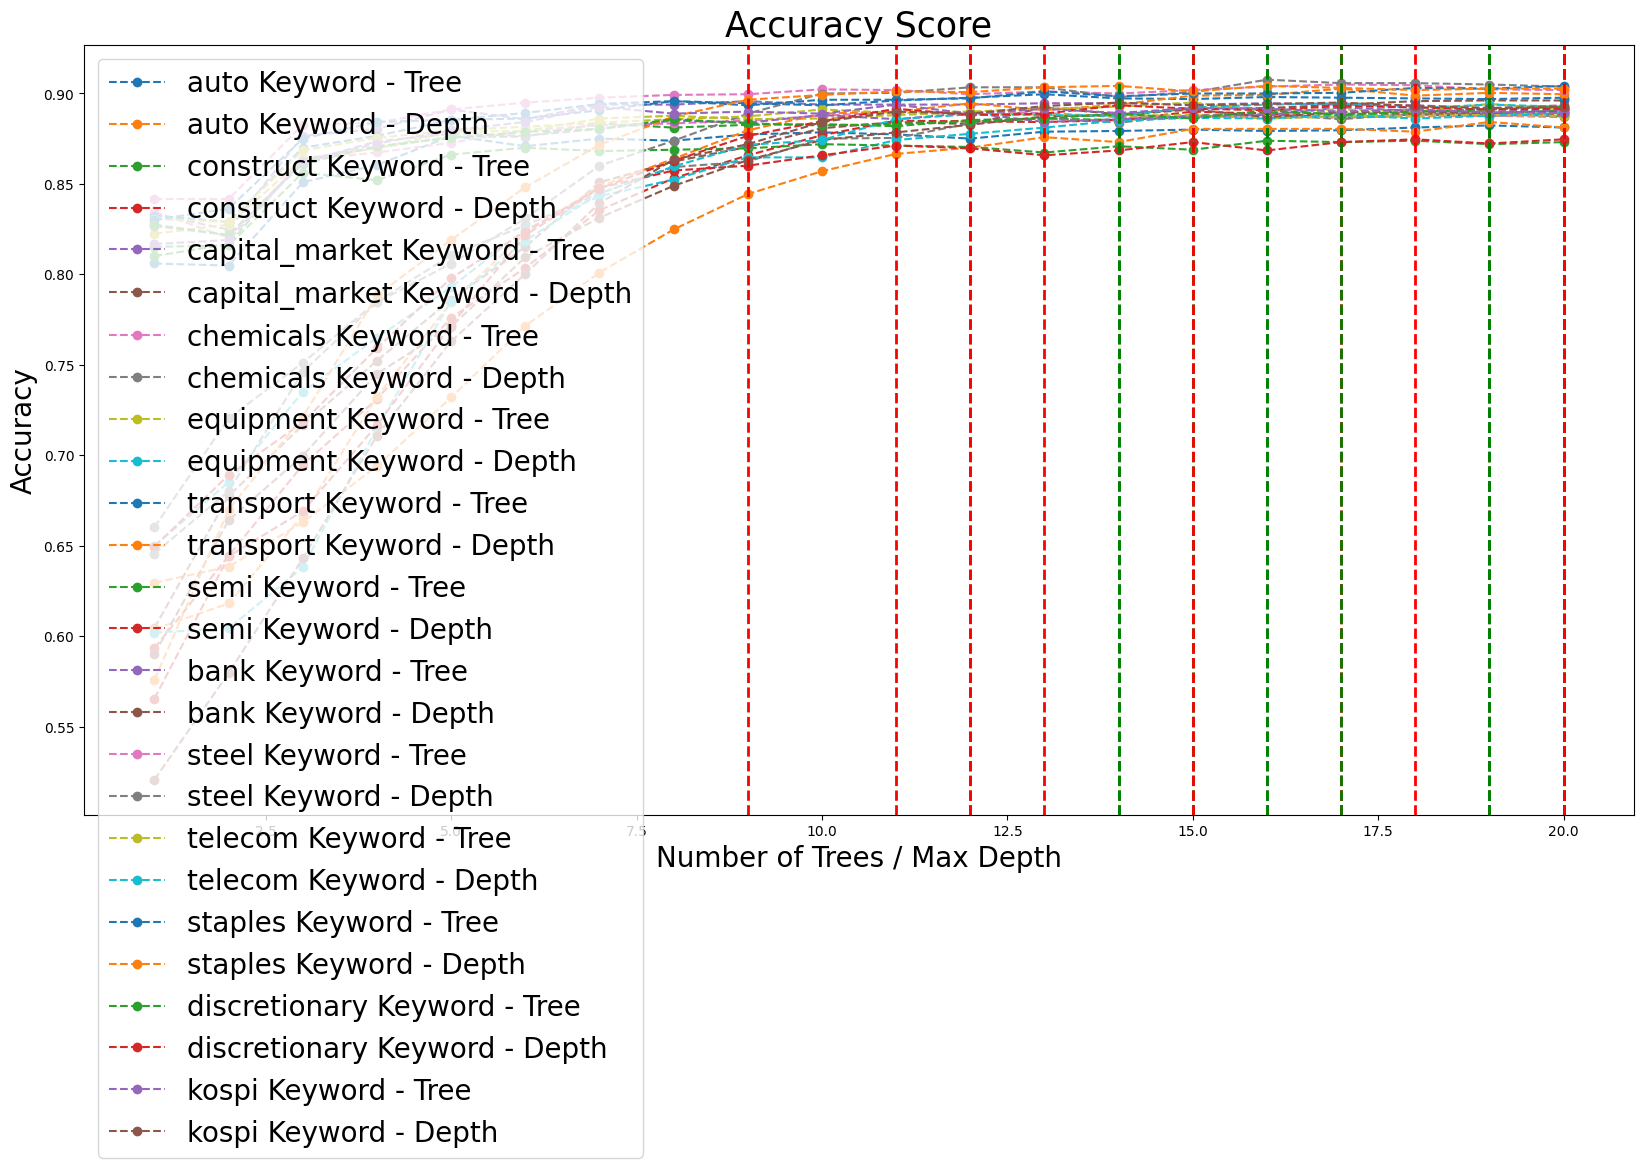

In [13]:
estimator_list = list(range(1, 21))  # 1부터 20까지의 값을 가지는 리스트
depth_list = list(range(1, 21))  # 1부터 20까지의 값을 가지는 리스트
cv_scores_per_keyword = {}  # 각 키워드에 대한 교차 검증 점수를 저장할 딕셔너리
best_estimators_per_keyword = {}  # 각 키워드에 대한 최적의 트리 수를 저장할 딕셔너리
best_depths_per_keyword = {}  # 각 키워드에 대한 최적의 깊이를 저장할 딕셔너리
# 각 키워드에 대한 분류기 및 Voting Classifier 생성

for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']
    
    cv_scores = []  # 교차 검증 점수를 저장할 리스트
    cv_scores_depth = []  # 교차 검증 점수를 저장할 리스트
    
    for i in tqdm(range(20)):
        rfc = RandomForestClassifier(n_estimators=i+1,
                                     max_leaf_nodes=300,
                                     n_jobs=-1,
                                     random_state=0)
        score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy').mean()
        cv_scores.append(score)

    best_estimator = estimator_list[np.argmax(cv_scores)]
    best_estimators_per_keyword[keyword] = best_estimator
    
    for i in tqdm(range(20)):
        rfc = RandomForestClassifier(n_estimators=best_estimator,
                                     max_depth=i+1,
                                     max_leaf_nodes=300,
                                     n_jobs=-1,
                                     random_state=0)
        score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy').mean()
        cv_scores_depth.append(score)

    best_depth = depth_list[np.argmax(cv_scores_depth)]
    best_depths_per_keyword[keyword] = best_depth
    
    # 교차 검증 점수를 딕셔너리에 저장
    cv_scores_per_keyword[keyword] = {'tree_scores': cv_scores, 'depth_scores': cv_scores_depth}

# 각 키워드에 대한 최적의 트리 수와 깊이 출력
for keyword in data_splits.keys():
    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]
    print(f"{keyword} 키워드에 대한 최적의 트리 수는 {best_estimator}, 최적의 깊이는 {best_depth} 입니다.")

# 각 키워드에 대한 교차 검증 점수 시각화
plt.figure(figsize=(20, 10))
for keyword, scores in cv_scores_per_keyword.items():
    plt.plot(estimator_list, scores['tree_scores'], marker='o', linestyle='dashed', label=f"{keyword} Keyword - Tree")
    plt.plot(depth_list, scores['depth_scores'], marker='o', linestyle='dashed', label=f"{keyword} Keyword - Depth")
plt.legend(fontsize=20)
plt.xlabel("Number of Trees / Max Depth", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
for keyword in data_splits.keys():
    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]
    plt.axvline(best_estimator, color='r', linestyle='--', linewidth=2)
    plt.axvline(best_depth, color='g', linestyle='--', linewidth=2)
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 각 키워드별 최적의 트리 개수와 최적의 깊이 출력
for keyword in data_splits.keys():
    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]

    
    # 최적의 트리 개수와 깊이를 사용하여 RandomForestClassifier 초기화
    rfc = RandomForestClassifier(n_estimators=best_estimator, 
                                 max_depth=best_depth, 
                                 max_leaf_nodes=300,
                                 n_jobs=-1,
                                 random_state=0)
    
    # 교차 검증을 통한 정확도 측정
    cv_scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
    
    # 평균 정확도 출력
    print(f"{keyword} 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)")
    print(f"평균 정확도: {cv_scores.mean():.4f}")
    
    # Train set에 대한 최적의 모델 학습
    rfc.fit(X_train, y_train)
    
    # Test set에 대한 예측값 생성
    y_pred = rfc.predict(X_test)
    
    # Test set에 대한 정확도 계산 및 출력
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred)
    print(f"{keyword} 키워드에 대한 Test set에 대한 성능")
    print(f"정확도: {acc_test:.4f}\n")
    
    # Test set에 대한 민감도와 정밀도 계산
    recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
    precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')

    # 민감도와 정밀도 출력
    
    # 혼동 행렬 생성
    cm = confusion_matrix(y_test, y_pred)




auto 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8907
auto 키워드에 대한 Test set에 대한 성능
정확도: 0.8972

construct 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8926
construct 키워드에 대한 Test set에 대한 성능
정확도: 0.8972

capital_market 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8888
capital_market 키워드에 대한 Test set에 대한 성능
정확도: 0.8957

chemicals 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8892
chemicals 키워드에 대한 Test set에 대한 성능
정확도: 0.9049

equipment 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8899
equipment 키워드에 대한 Test set에 대한 성능
정확도: 0.9049

transport 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8900
transport 키워드에 대한 Test set에 대한 성능
정확도: 0.9080

semi 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8903
semi 키워드에 대한 Test set에 대한 성능
정확도: 0.8926

bank 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8953
bank 키워드에 대한 Test set에 대한 성능
정확도: 0.8957

steel 키워드에 대한 Train set에 대한 

### 그 이전에 나온 값과 비교 해 보았을때 더 우수한 데이터 결과가 나옴

### 따라서 최종적으로 뽑아본다면은 이런식으로 나온다

auto 키워드에 대한 최적의 트리 개수: 19
auto 키워드에 대한 최적의 깊이 개수: 19
auto 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8907
auto 키워드에 대한 Test set에 대한 성능
정확도: 0.8972

auto 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8913, 정밀도: 0.8884



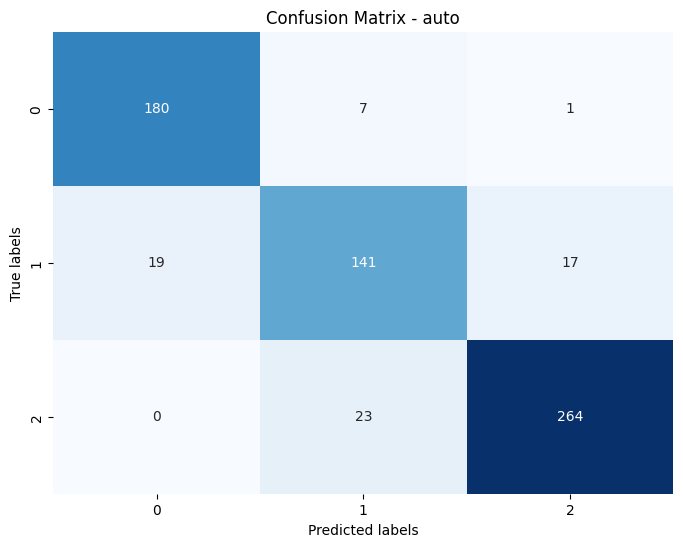

construct 키워드에 대한 최적의 트리 개수: 20
construct 키워드에 대한 최적의 깊이 개수: 15
construct 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8926
construct 키워드에 대한 Test set에 대한 성능
정확도: 0.8972

construct 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8916, 정밀도: 0.8876



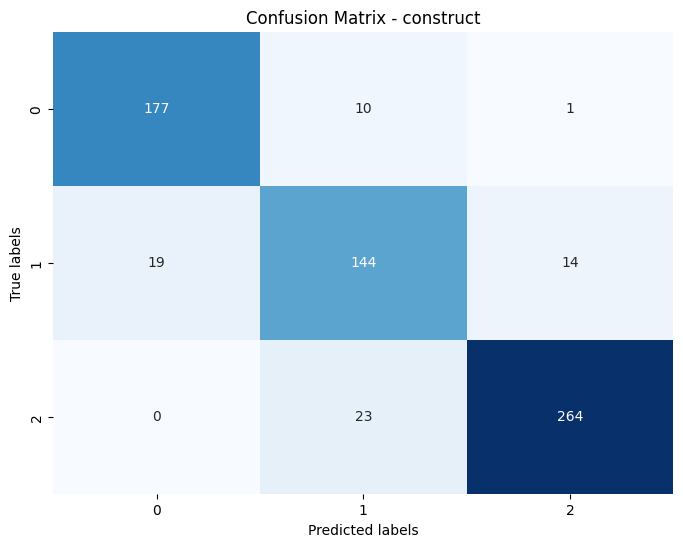

capital_market 키워드에 대한 최적의 트리 개수: 9
capital_market 키워드에 대한 최적의 깊이 개수: 19
capital_market 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8888
capital_market 키워드에 대한 Test set에 대한 성능
정확도: 0.8957

capital_market 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8889, 정밀도: 0.8863



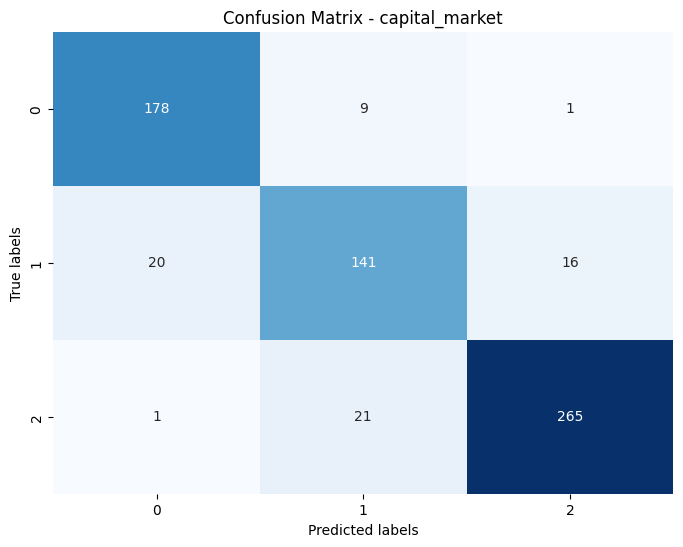

chemicals 키워드에 대한 최적의 트리 개수: 12
chemicals 키워드에 대한 최적의 깊이 개수: 19
chemicals 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8892
chemicals 키워드에 대한 Test set에 대한 성능
정확도: 0.9049

chemicals 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.9007, 정밀도: 0.8961



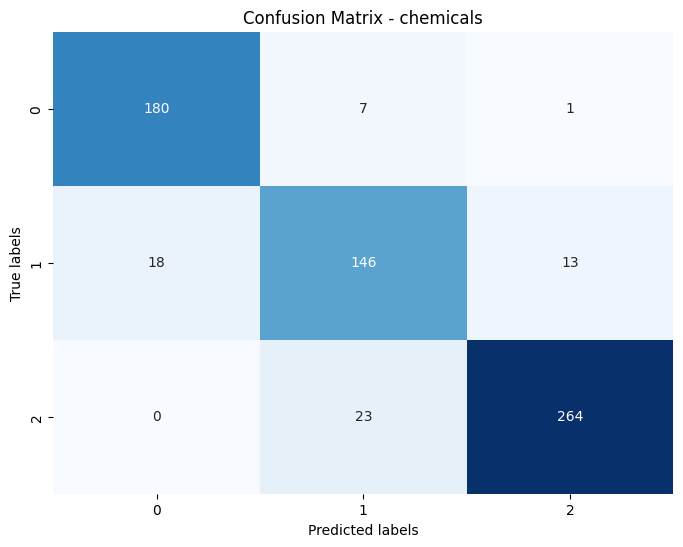

equipment 키워드에 대한 최적의 트리 개수: 12
equipment 키워드에 대한 최적의 깊이 개수: 20
equipment 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8899
equipment 키워드에 대한 Test set에 대한 성능
정확도: 0.9049

equipment 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.9007, 정밀도: 0.8961



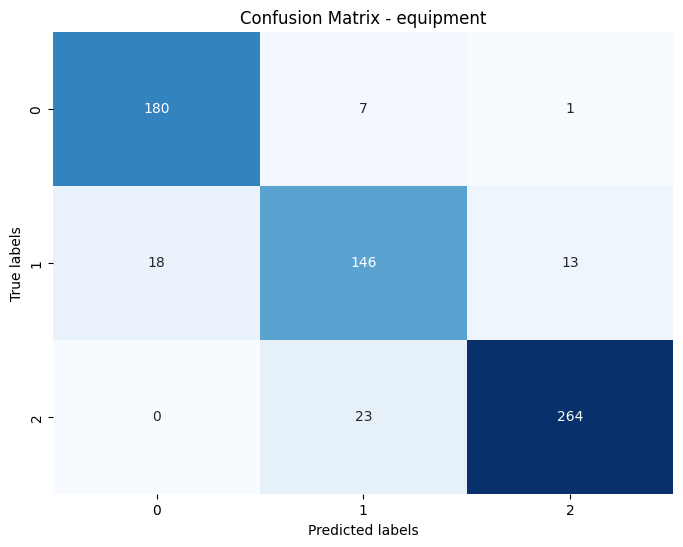

transport 키워드에 대한 최적의 트리 개수: 13
transport 키워드에 대한 최적의 깊이 개수: 17
transport 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8900
transport 키워드에 대한 Test set에 대한 성능
정확도: 0.9080

transport 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.9024, 정밀도: 0.8997



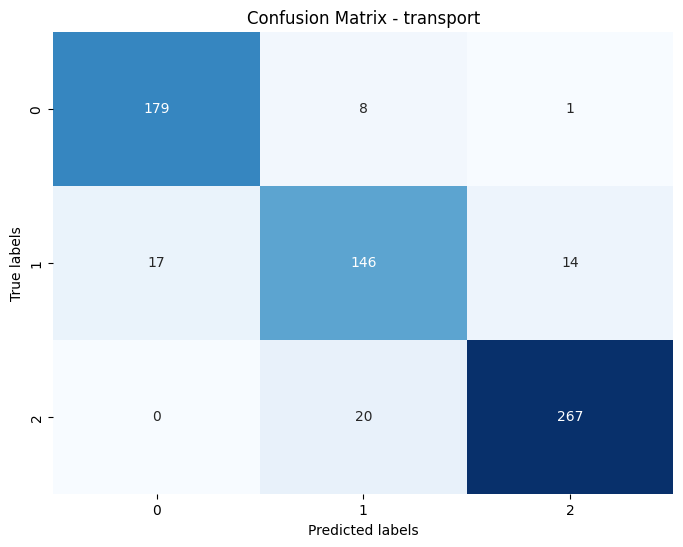

semi 키워드에 대한 최적의 트리 개수: 18
semi 키워드에 대한 최적의 깊이 개수: 20
semi 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8903
semi 키워드에 대한 Test set에 대한 성능
정확도: 0.8926

semi 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8863, 정밀도: 0.8830



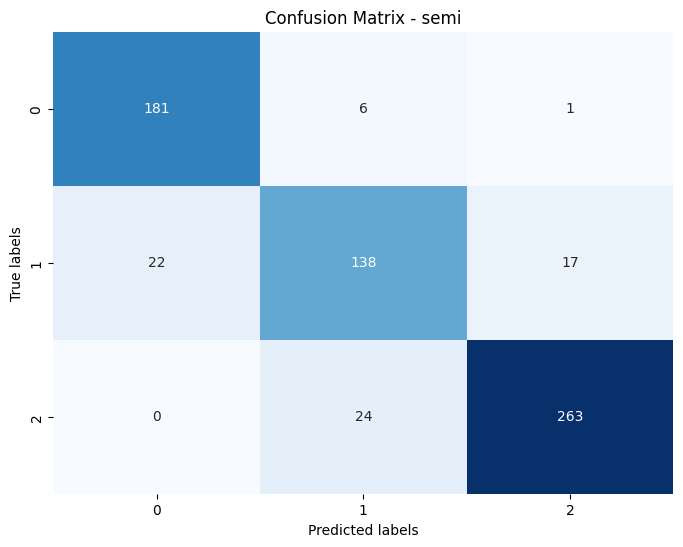

bank 키워드에 대한 최적의 트리 개수: 17
bank 키워드에 대한 최적의 깊이 개수: 15
bank 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8953
bank 키워드에 대한 Test set에 대한 성능
정확도: 0.8957

bank 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8899, 정밀도: 0.8859



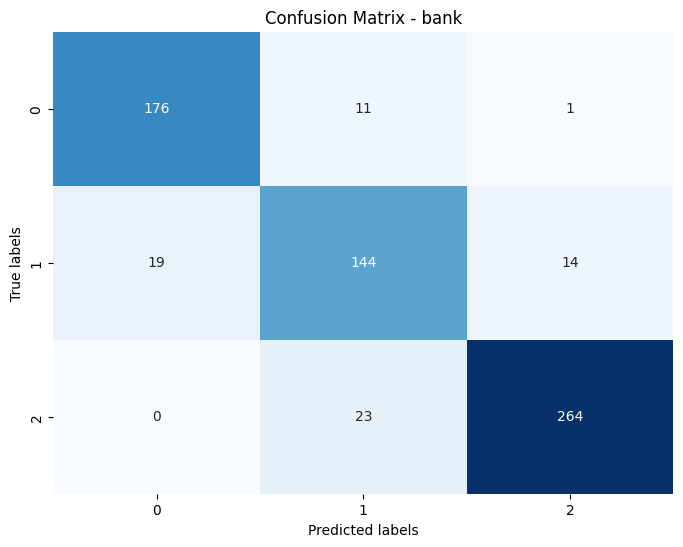

steel 키워드에 대한 최적의 트리 개수: 17
steel 키워드에 대한 최적의 깊이 개수: 16
steel 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8907
steel 키워드에 대한 Test set에 대한 성능
정확도: 0.8988

steel 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8934, 정밀도: 0.8902



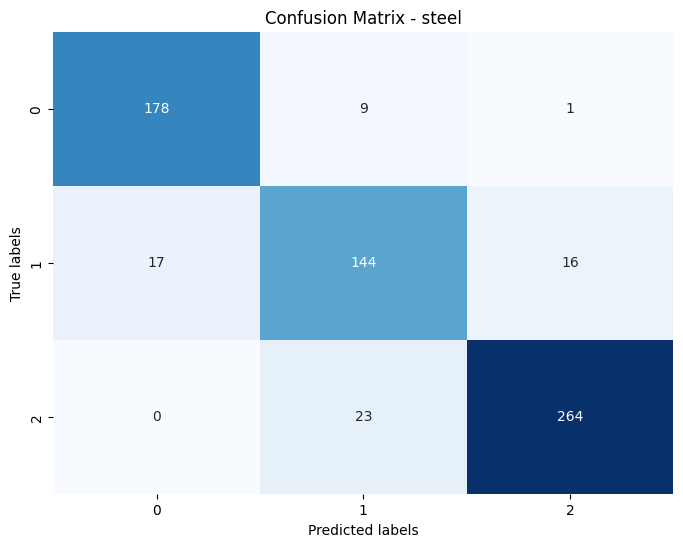

telecom 키워드에 대한 최적의 트리 개수: 15
telecom 키워드에 대한 최적의 깊이 개수: 17
telecom 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8930
telecom 키워드에 대한 Test set에 대한 성능
정확도: 0.8942

telecom 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8885, 정밀도: 0.8861



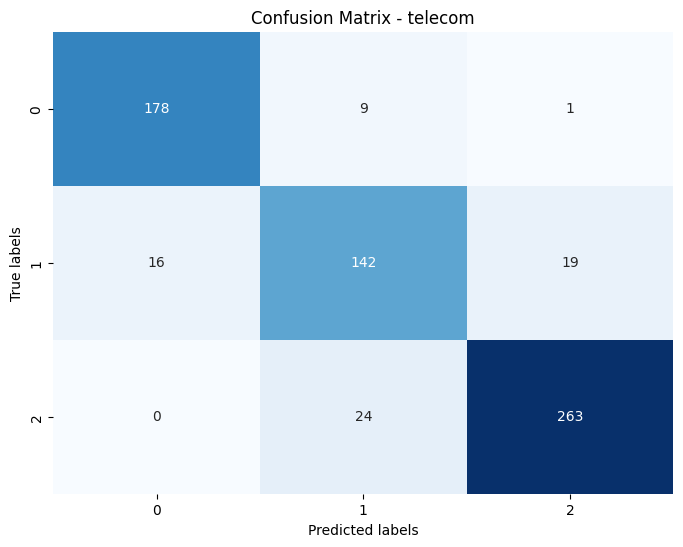

staples 키워드에 대한 최적의 트리 개수: 20
staples 키워드에 대한 최적의 깊이 개수: 16
staples 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8922
staples 키워드에 대한 Test set에 대한 성능
정확도: 0.8972

staples 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8921, 정밀도: 0.8879



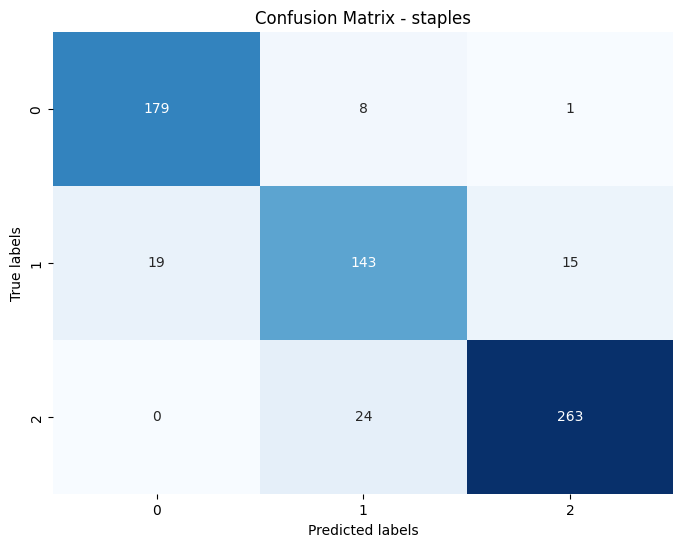

discretionary 키워드에 대한 최적의 트리 개수: 20
discretionary 키워드에 대한 최적의 깊이 개수: 14
discretionary 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8965
discretionary 키워드에 대한 Test set에 대한 성능
정확도: 0.8926

discretionary 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8839, 정밀도: 0.8818



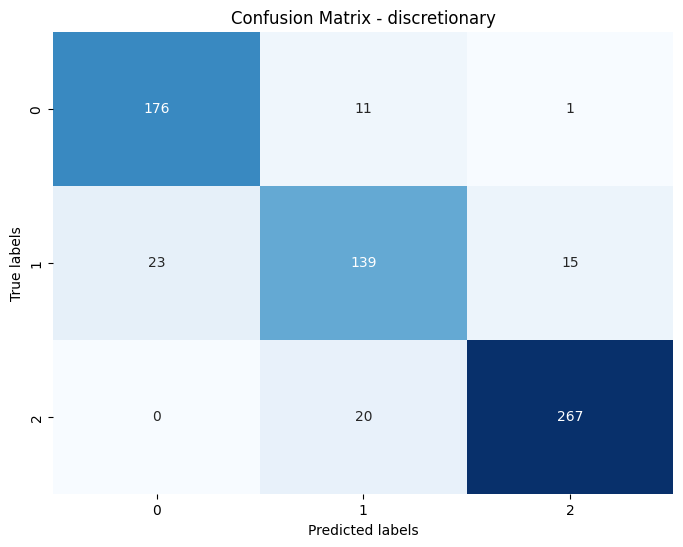

kospi 키워드에 대한 최적의 트리 개수: 11
kospi 키워드에 대한 최적의 깊이 개수: 14
kospi 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8949
kospi 키워드에 대한 Test set에 대한 성능
정확도: 0.9049

kospi 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8964, 정밀도: 0.8973



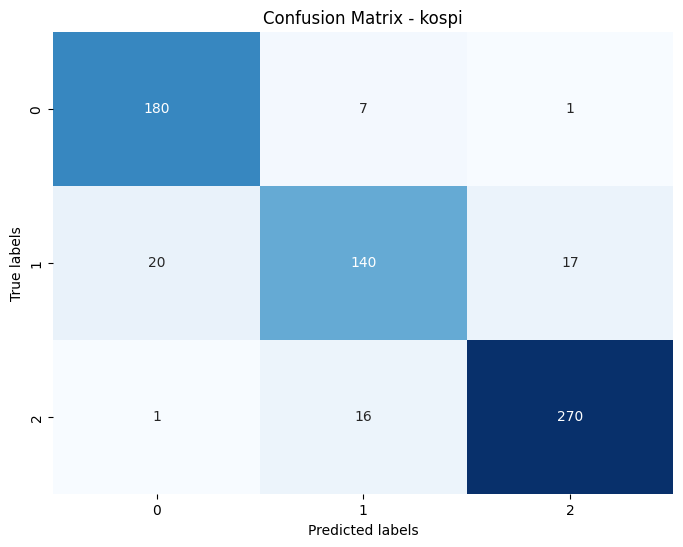

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 각 키워드별 최적의 트리 개수와 최적의 깊이 출력
for keyword in data_splits.keys():
    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]
    print(f"{keyword} 키워드에 대한 최적의 트리 개수: {best_estimator}")
    print(f"{keyword} 키워드에 대한 최적의 깊이 개수: {best_depth}")
    
    # 최적의 트리 개수와 깊이를 사용하여 RandomForestClassifier 초기화
    rfc = RandomForestClassifier(n_estimators=best_estimator, 
                                 max_depth=best_depth, 
                                 max_leaf_nodes=300,
                                 n_jobs=-1,
                                 random_state=0)
    
    # 교차 검증을 통한 정확도 측정
    cv_scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
    
    # 평균 정확도 출력
    print(f"{keyword} 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)")
    print(f"평균 정확도: {cv_scores.mean():.4f}")
    
    # Train set에 대한 최적의 모델 학습
    rfc.fit(X_train, y_train)
    
    # Test set에 대한 예측값 생성
    y_pred = rfc.predict(X_test)
    
    # Test set에 대한 정확도 계산 및 출력
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred)
    print(f"{keyword} 키워드에 대한 Test set에 대한 성능")
    print(f"정확도: {acc_test:.4f}\n")
    
    # Test set에 대한 민감도와 정밀도 계산
    recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
    precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')

    # 민감도와 정밀도 출력
    print(f"{keyword} 키워드에 대한 Test set에 대한 민감도와 정밀도")
    print(f"민감도: {recall:.4f}, 정밀도: {precision:.4f}\n")
    
    # 혼동 행렬 생성
    cm = confusion_matrix(y_test, y_pred)

    # 혼동 행렬 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='d', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {keyword}')
    plt.show()


### 이후 피처별 중요한 것들을 출력하고 싶었고 키워드별 상위 5개만 출력했다


In [16]:
# 각 키워드별 상위 5개 특성의 인덱스와 중요도 출력
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']

    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]

    # RandomForestClassifier 초기화 및 학습
    rfc = RandomForestClassifier(n_estimators=best_estimator, 
                                 max_depth=best_depth, 
                                 max_leaf_nodes=300,
                                 n_jobs=-1,
                                 random_state=0)
    rfc.fit(X_train, y_train)

    # Feature Importance 계산
    feats = {}
    for feature, importance in zip(range(X_train.shape[1]), rfc.feature_importances_):
        feats[feature] = importance

    # 중요도 순으로 정렬하여 상위 5개 선택
    sorted_feats = sorted(feats.items(), key=lambda x: x[1], reverse=True)
    top_5_importances = sorted_feats[:5]

    # 상위 5개 특성의 인덱스와 중요도 출력
    print(f"{keyword} 키워드의 상위 5개 특성:")
    for feature_index, importance in top_5_importances:
        feature_name = column_names_per_keyword[keyword][feature_index]  # 열 이름 가져오기
        print(f"Feature Name: {feature_name}, Importance: {importance:.4f}")
    print()
    


auto 키워드의 상위 5개 특성:
Feature Name: us_e_infla, Importance: 0.0444
Feature Name: 달러 인덱스, Importance: 0.0327
Feature Name: 중국 산업 생산, Importance: 0.0259
Feature Name: PPI, Importance: 0.0244
Feature Name: per, Importance: 0.0218

construct 키워드의 상위 5개 특성:
Feature Name: 중국 산업 생산, Importance: 0.0409
Feature Name: TIPS, Importance: 0.0391
Feature Name: 중국고정자산투자(yoy%), Importance: 0.0259
Feature Name: WTI_60, Importance: 0.0211
Feature Name: 달러 인덱스_60, Importance: 0.0198

capital_market 키워드의 상위 5개 특성:
Feature Name: 중국 산업 생산, Importance: 0.0501
Feature Name: 구리선물, Importance: 0.0466
Feature Name: export, Importance: 0.0354
Feature Name: DGS2, Importance: 0.0321
Feature Name: usa_cpi, Importance: 0.0248

chemicals 키워드의 상위 5개 특성:
Feature Name: 중국 산업 생산, Importance: 0.0858
Feature Name: VIX, Importance: 0.0642
Feature Name: export_60, Importance: 0.0326
Feature Name: lc_price, Importance: 0.0286
Feature Name: chemicals, Importance: 0.0245

equipment 키워드의 상위 5개 특성:
Feature Name: TIPS, Importance: 0.

### 이후 이것을 그래프로 변환해서 출력
### 생각보다 자동차지수와 중국 지표 금 구리 이런게 영향을 많이 미치는구마잉!

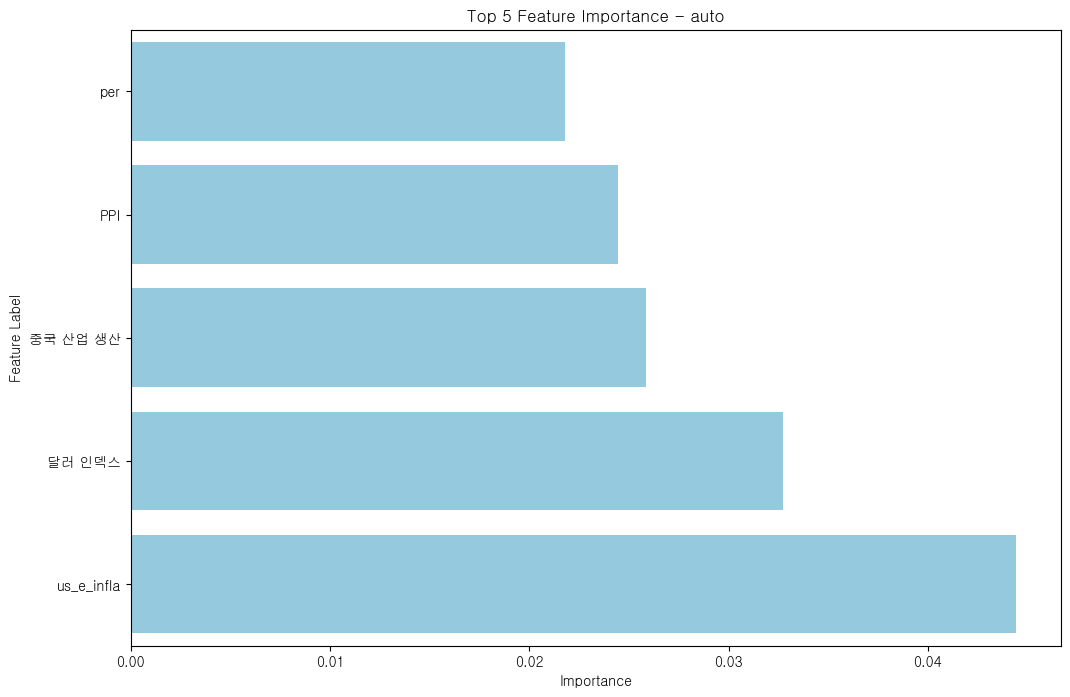

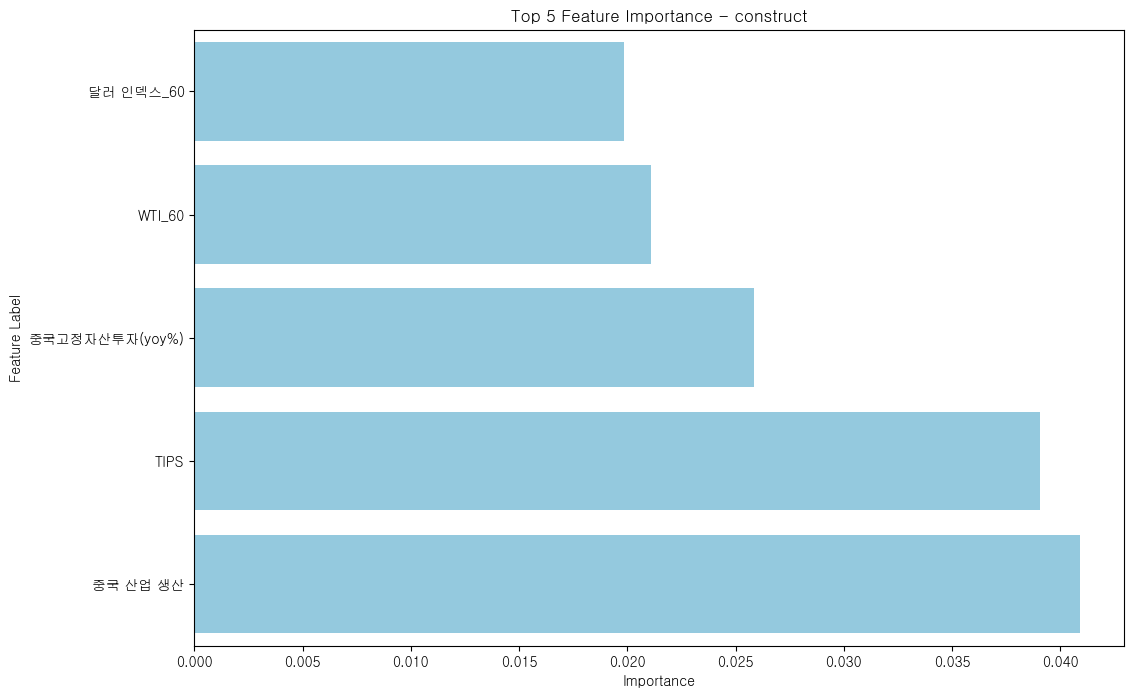

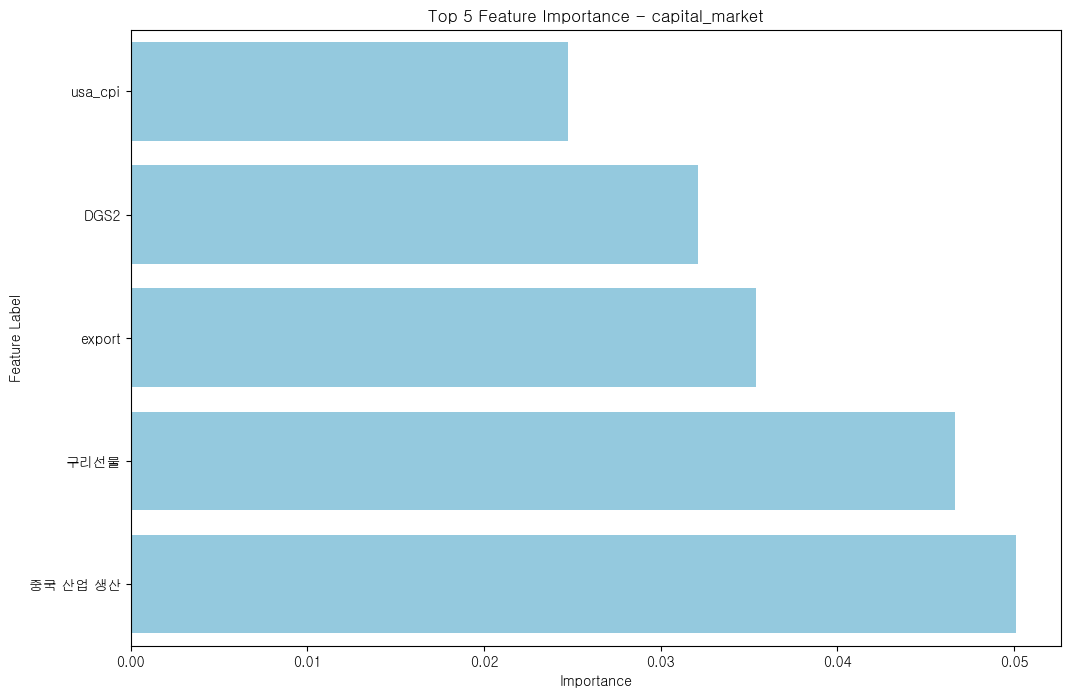

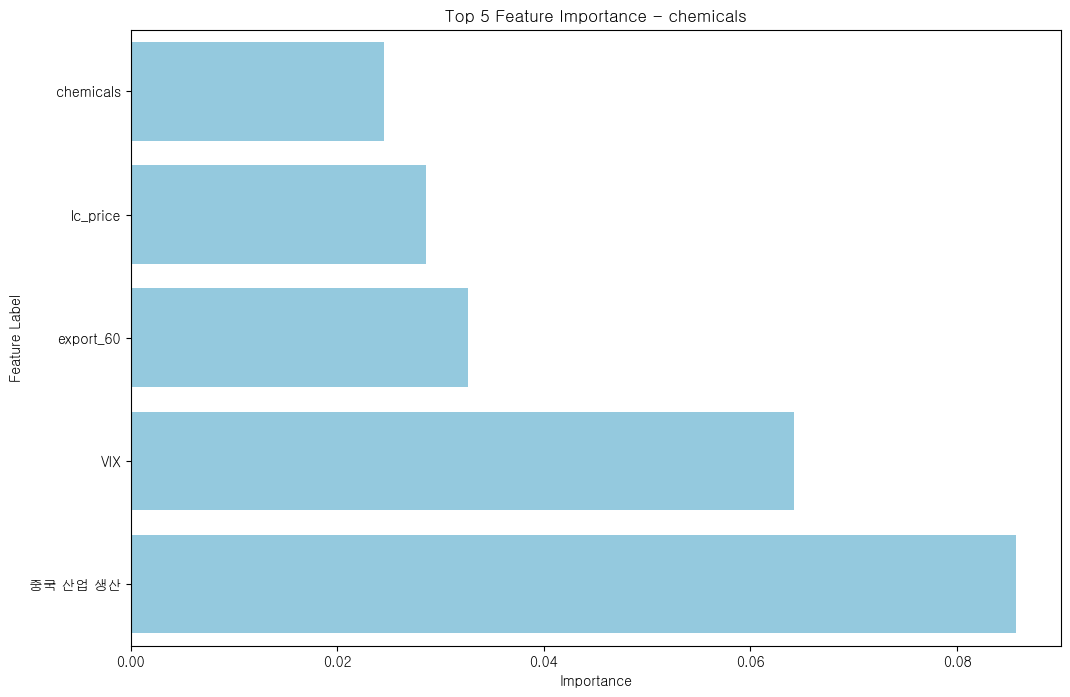

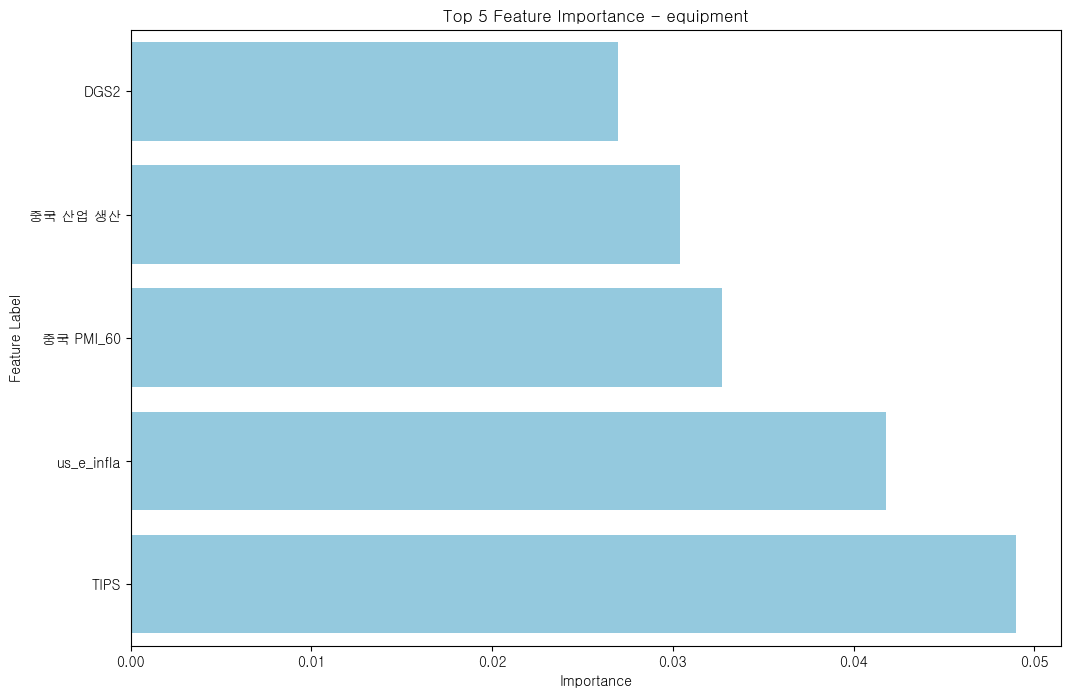

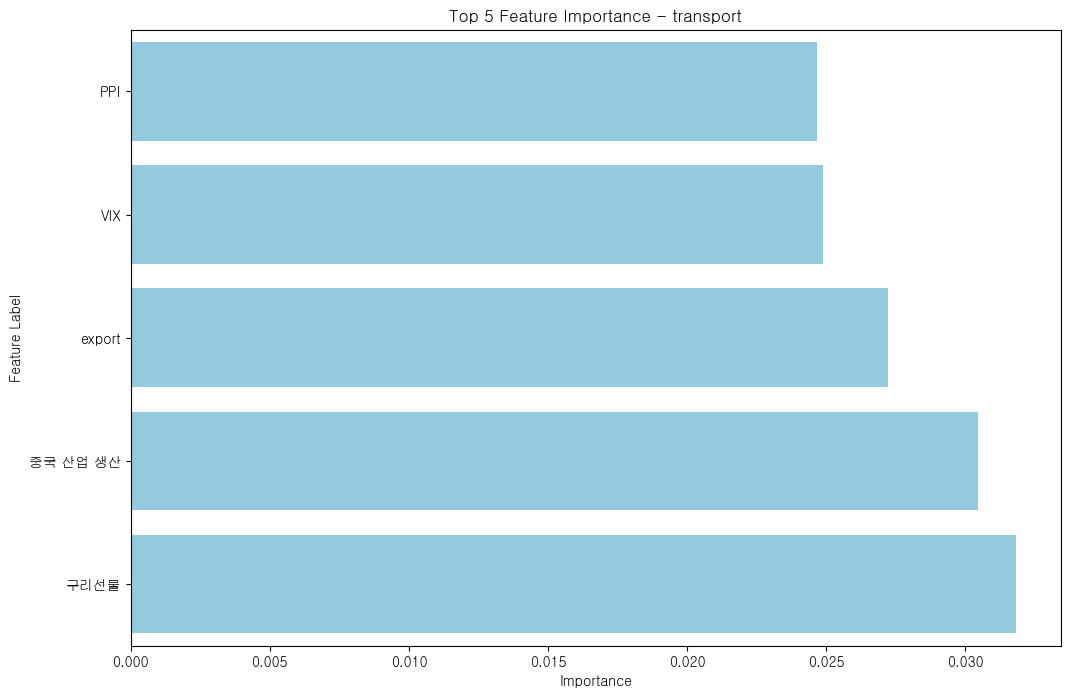

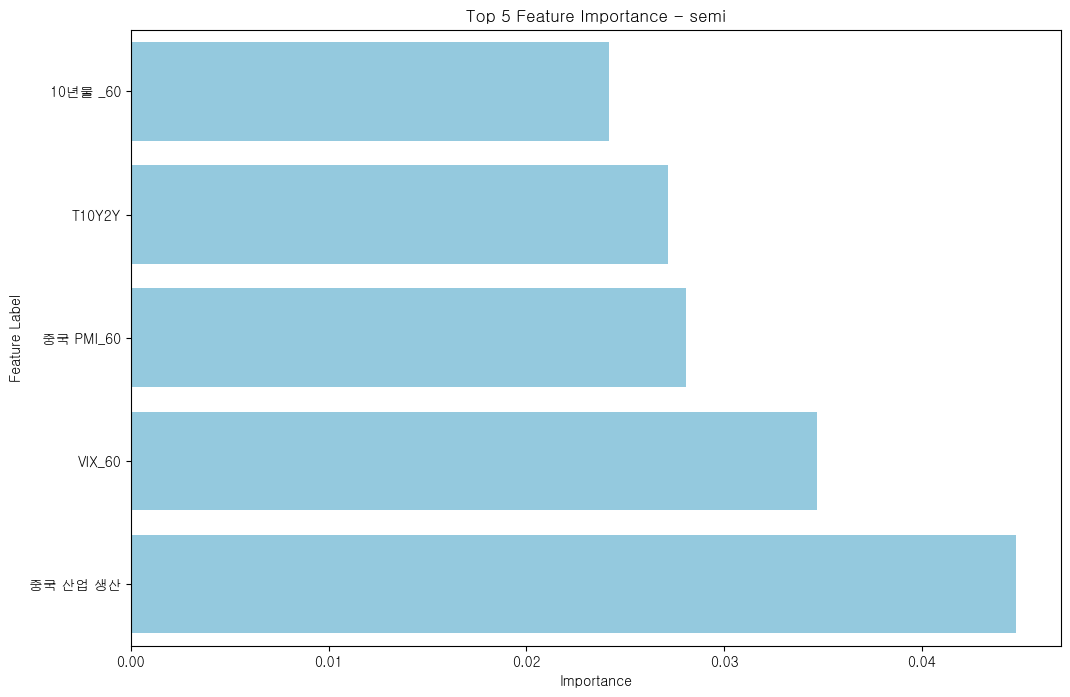

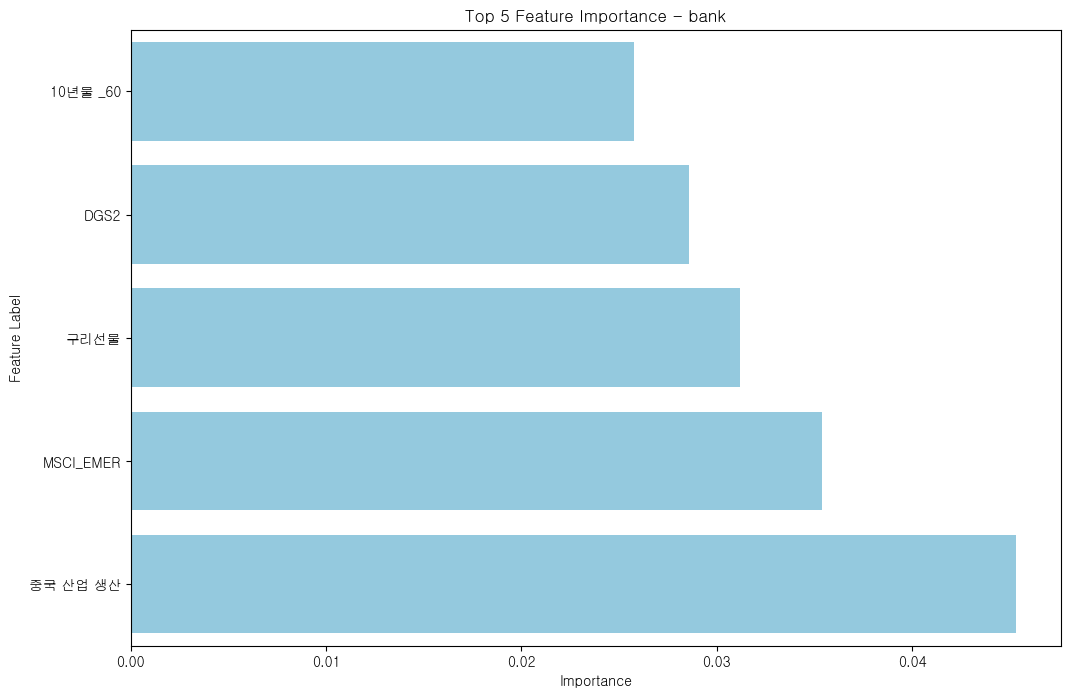

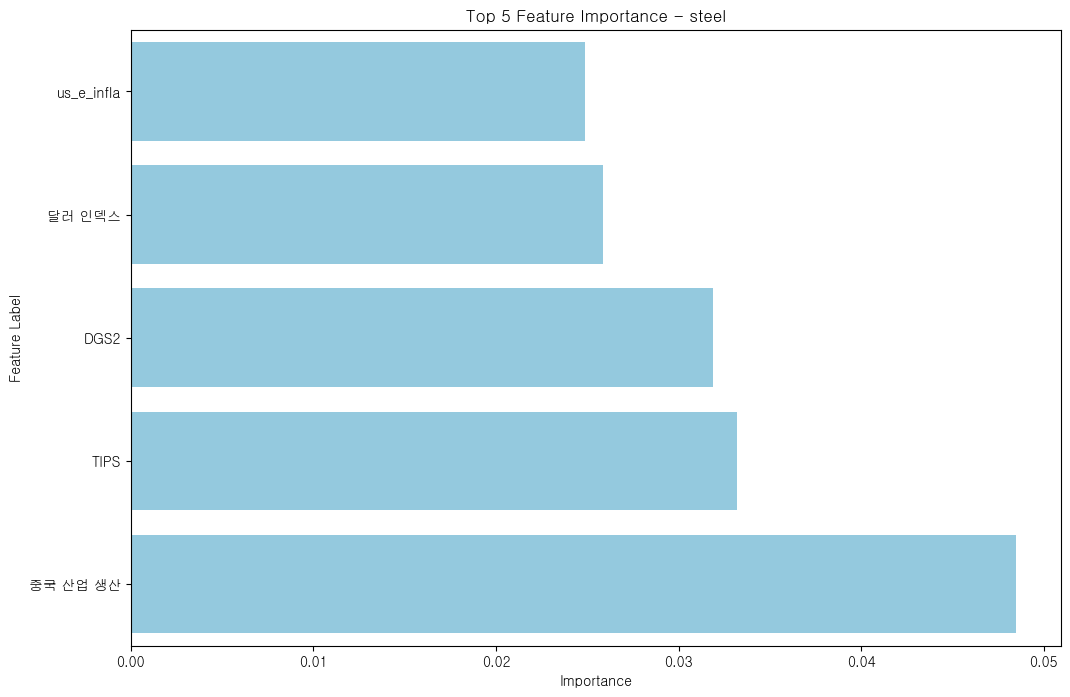

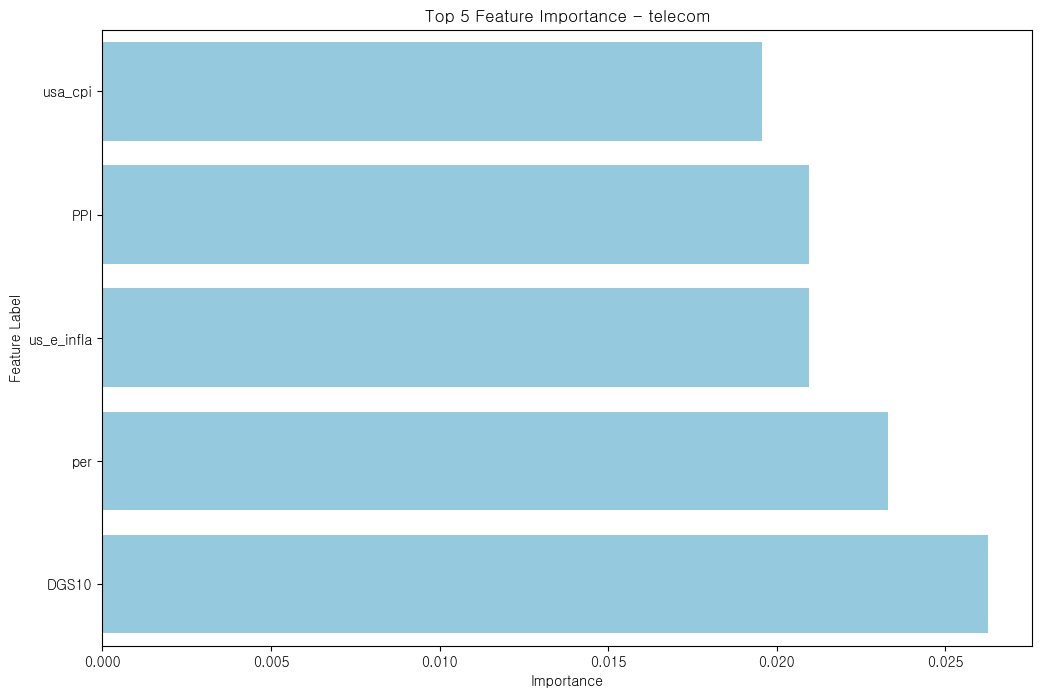

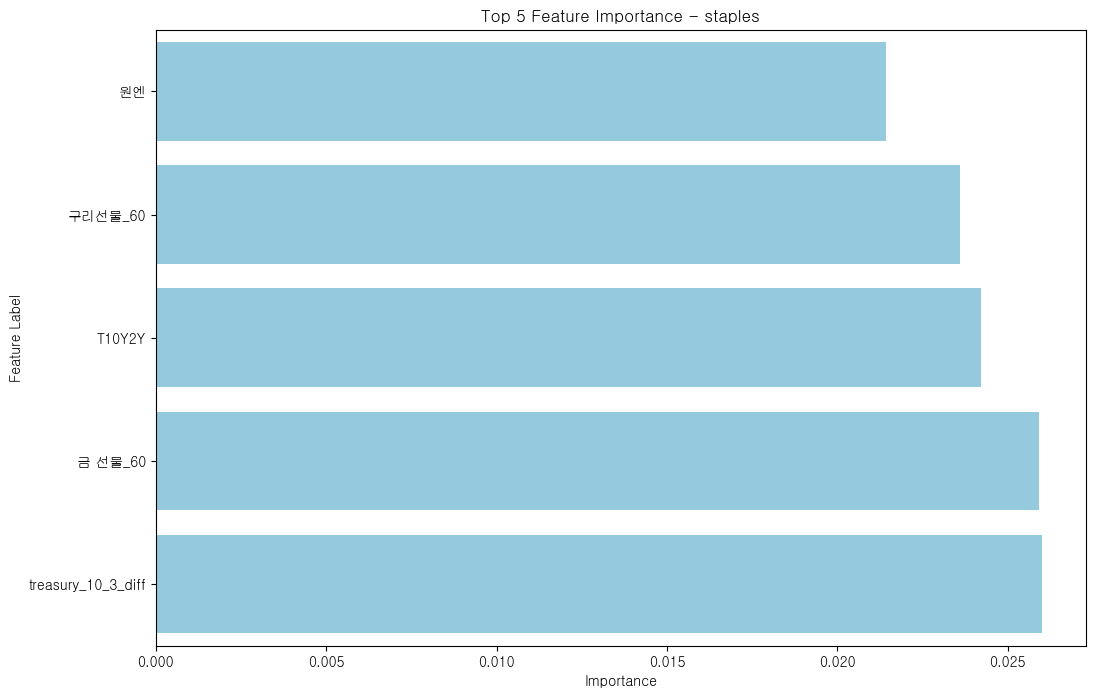

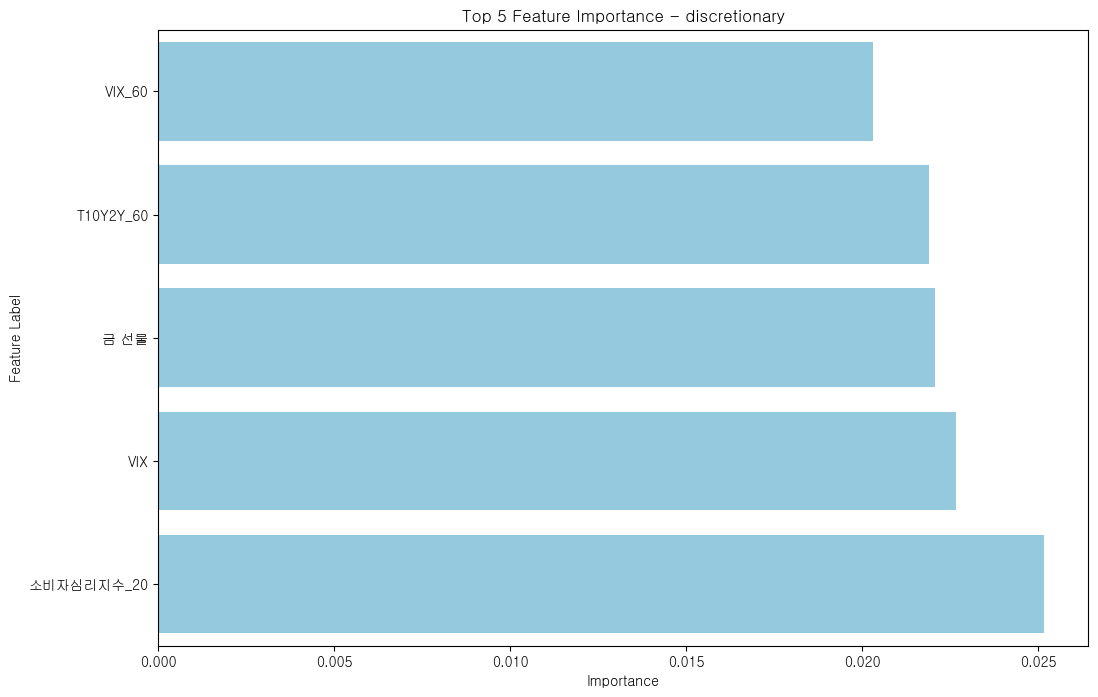

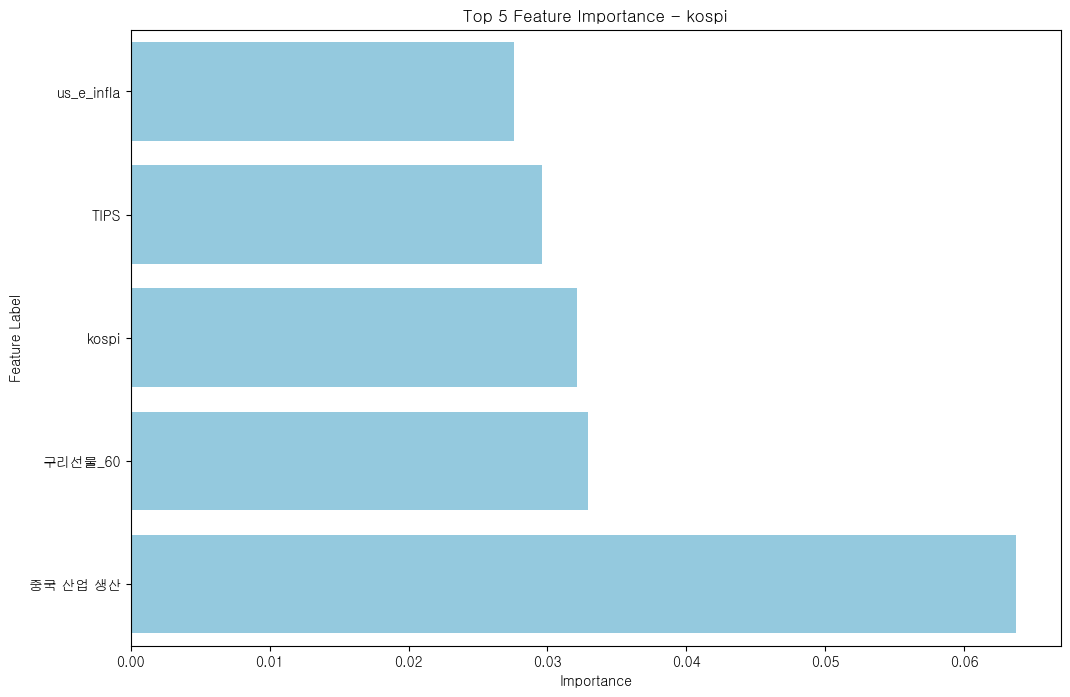

In [17]:
# 상위 5개 특성의 이름과 중요도 분리하여 그래프 출력
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
from matplotlib import font_manager, rc
path = f'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']

    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]

    # RandomForestClassifier 초기화 및 학습
    rfc = RandomForestClassifier(n_estimators=best_estimator, 
                                 max_depth=best_depth, 
                                 max_leaf_nodes=300,
                                 n_jobs=-1,
                                 random_state=0)
    rfc.fit(X_train, y_train)

    # Feature Importance 계산
    feats = {}
    for feature, importance in zip(range(X_train.shape[1]), rfc.feature_importances_):
        feats[feature] = importance

    # 중요도 순으로 정렬하여 상위 5개 선택
    sorted_feats = sorted(feats.items(), key=lambda x: x[1], reverse=True)
    top_5_importances = sorted_feats[:5]

    # 상위 5개 특성의 이름과 중요도 분리
    top_5_features = [column_names_per_keyword[keyword][feature_index] for feature_index, _ in top_5_importances]
    top_5_importance_values = [importance for _, importance in top_5_importances]

    # 그래프 출력
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_5_importance_values, y=top_5_features, color='skyblue')
    plt.title(f'Top 5 Feature Importance - {keyword}')
    plt.xlabel('Importance')
    plt.ylabel('Feature Label')
    plt.gca().invert_yaxis()  # y축 라벨 역순으로 표시
    plt.show()


### 모델을 저장하고 다시 불러옴

### 모델을 통해서 다음날이 어떨지에 대해서 예측해봄

Model for auto keyword saved as plk_folder/auto_model.pkl
Model for construct keyword saved as plk_folder/construct_model.pkl
Model for capital_market keyword saved as plk_folder/capital_market_model.pkl
Model for chemicals keyword saved as plk_folder/chemicals_model.pkl
Model for equipment keyword saved as plk_folder/equipment_model.pkl
Model for transport keyword saved as plk_folder/transport_model.pkl
Model for semi keyword saved as plk_folder/semi_model.pkl
Model for bank keyword saved as plk_folder/bank_model.pkl
Model for steel keyword saved as plk_folder/steel_model.pkl
Model for telecom keyword saved as plk_folder/telecom_model.pkl
Model for staples keyword saved as plk_folder/staples_model.pkl
Model for discretionary keyword saved as plk_folder/discretionary_model.pkl
Model for kospi keyword saved as plk_folder/kospi_model.pkl

< AI model: save >
Model for auto keyword loaded from plk_folder/auto_model.pkl
Model for construct keyword loaded from plk_folder/construct_model.pkl


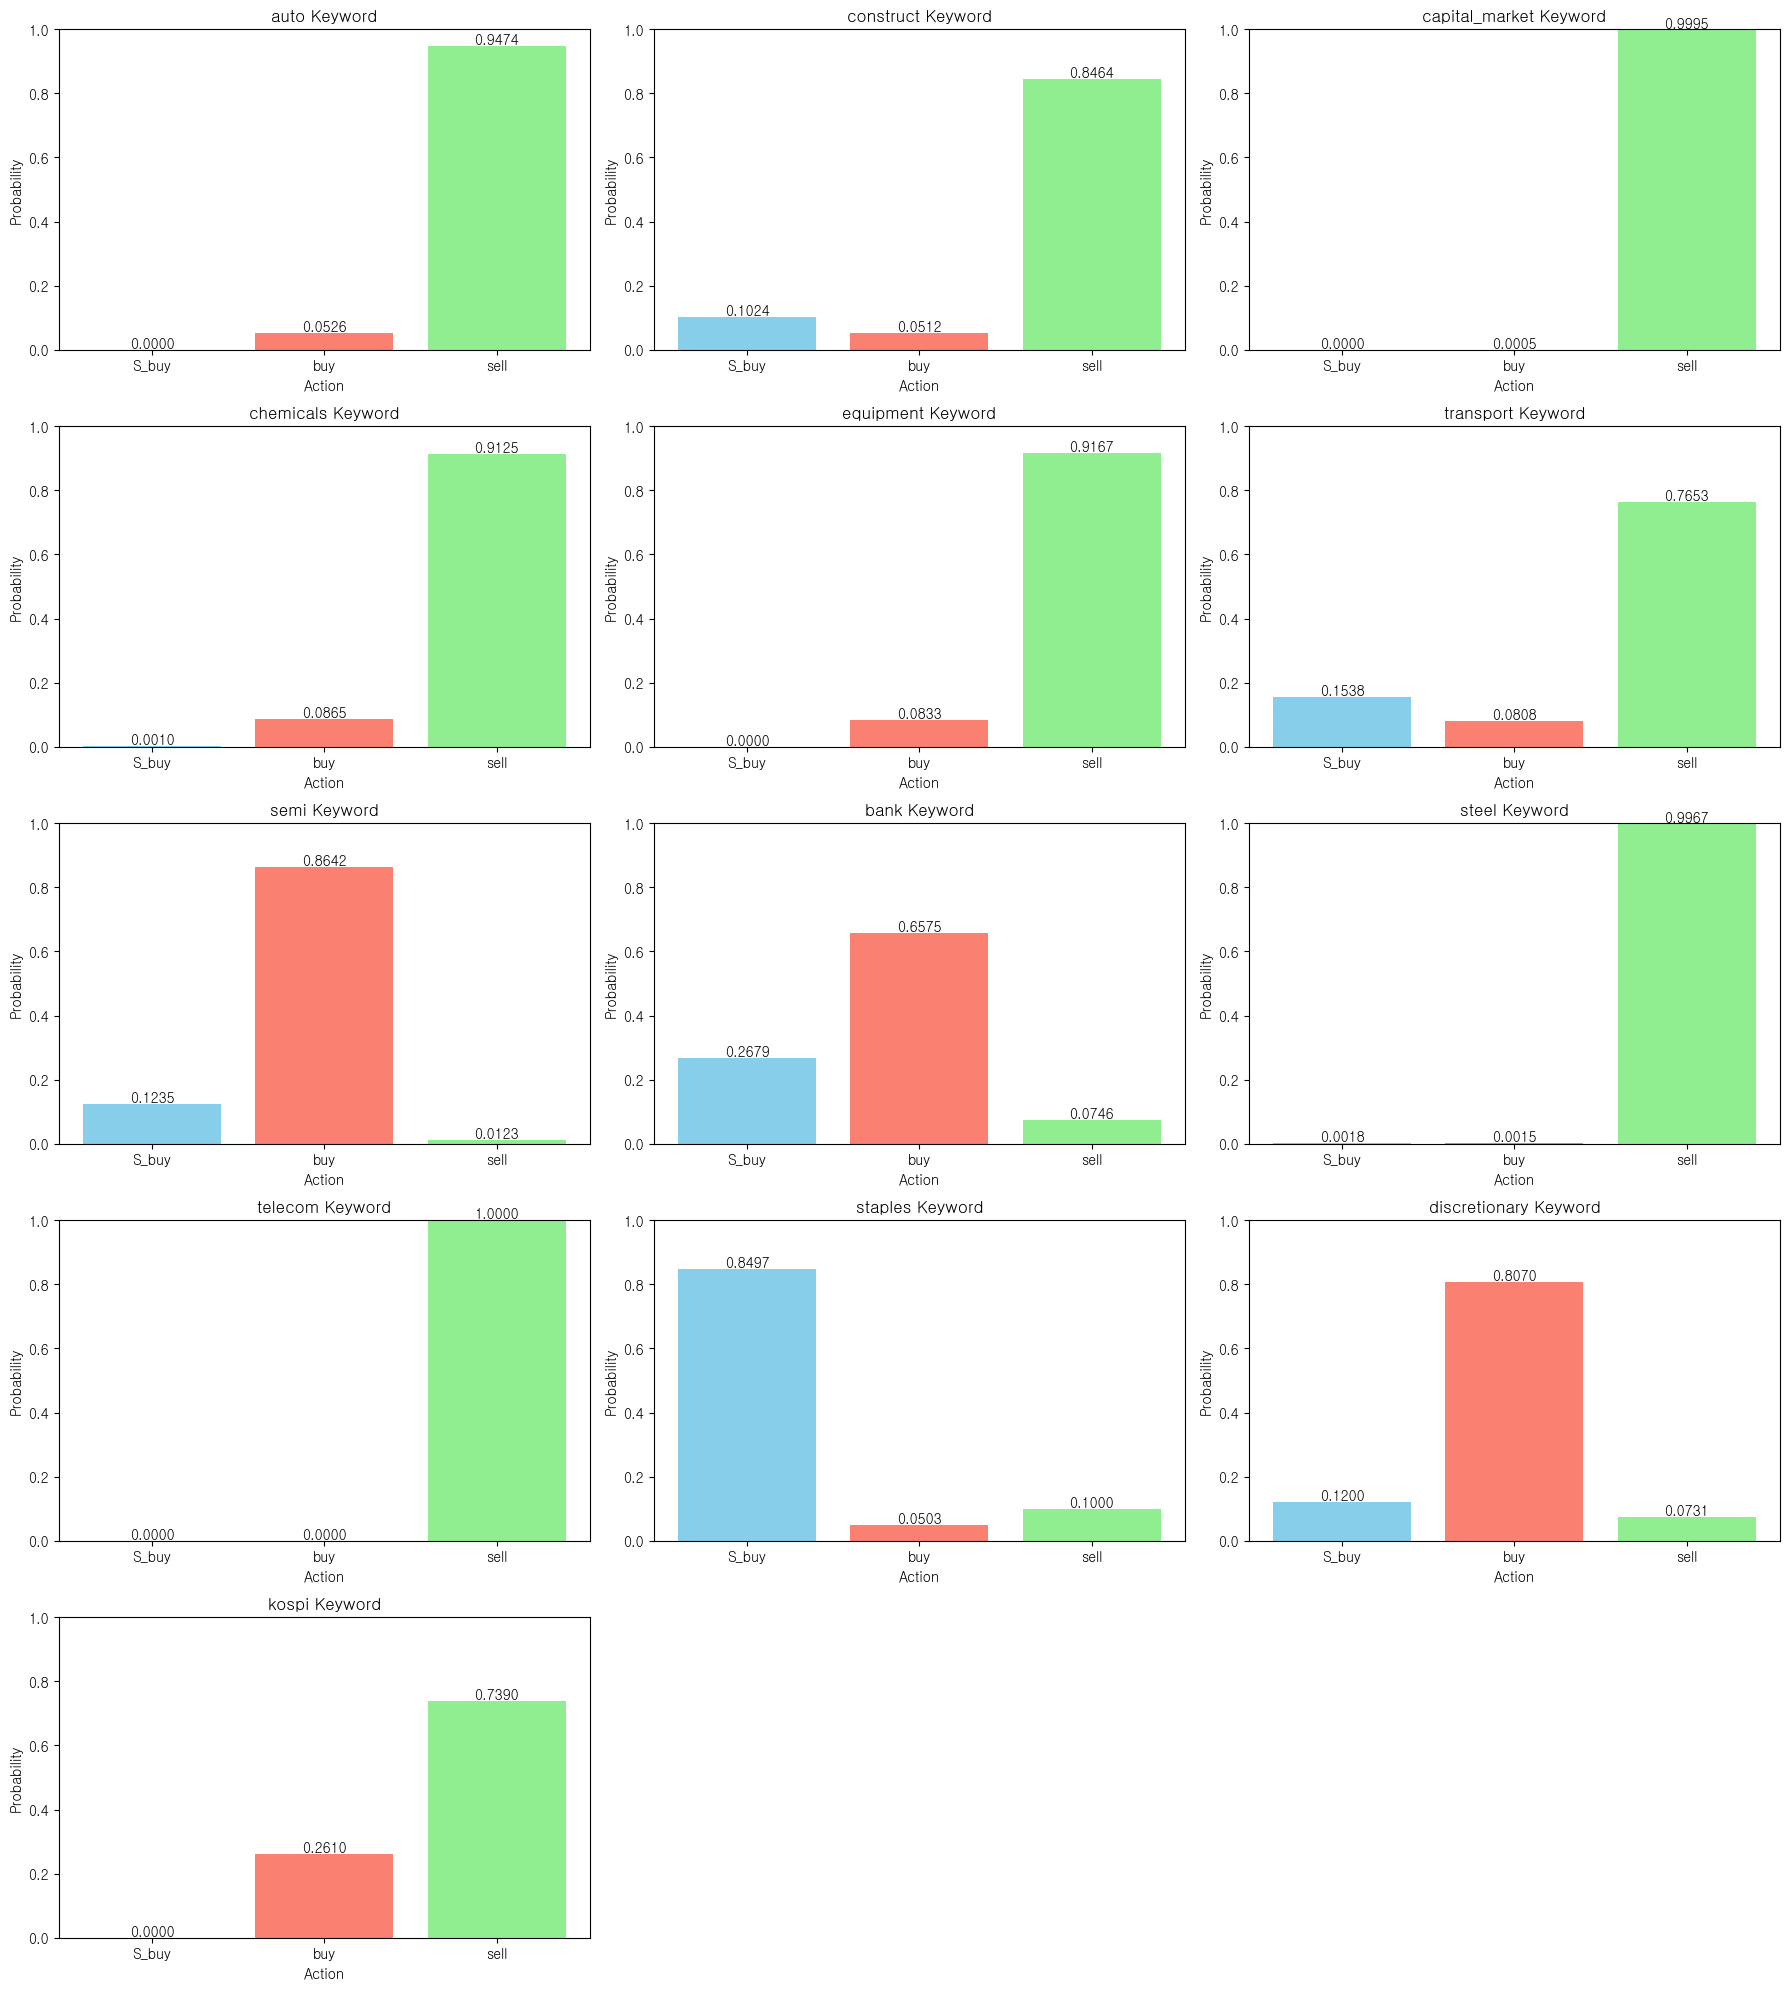

In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 디렉토리가 없다면 생성
if not os.path.exists('plk_folder'):
    os.makedirs('plk_folder')

# 각 키워드별로 최종 모델 학습 및 모델 저장
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']

    # RandomForestClassifier 초기화
    rfc = RandomForestClassifier(n_estimators=best_estimators_per_keyword[keyword], 
                                 max_depth=best_depths_per_keyword[keyword], 
                                 max_leaf_nodes=300,
                                 n_jobs=-1,
                                 random_state=0)

    # 최종 모델 학습
    rfc.fit(X_train, y_train)

    # 모델 저장
    filename = f"plk_folder/{keyword}_model.pkl"
    dump(rfc, filename)
    print(f"Model for {keyword} keyword saved as {filename}")

print("\n< AI model: save >")

# 모델 로드
loaded_models = {}

# 각 키워드별로 모델 로드
for keyword in keywords:
    filename = f"plk_folder/{keyword}_model.pkl"
    if os.path.exists(filename):
        loaded_models[keyword] = load(filename)
        print(f"Model for {keyword} keyword loaded from {filename}")
    else:
        print(f"Model file for {keyword} keyword does not exist: {filename}")

print("\n< AI model: load >")

# 각 키워드별로 S_buy, buy, sell의 확률 예측
probabilities = {}
for keyword, model in loaded_models.items():
    X_test = data_splits[keyword]['X_test'][-1].reshape(1, -1)

    # 각 클래스의 확률 예측
    prob_current = model.predict_proba(X_test)
    y_names = model.classes_

    # 결과 저장
    probabilities[keyword] = {'S_buy': prob_current[0][0], 'buy': prob_current[0][1], 'sell': prob_current[0][2]}

# 그래프로 출력
num_keywords = len(probabilities)
num_rows = (num_keywords + 2) // 3
num_cols = min(num_keywords, 3)
plt.figure(figsize=(6 * num_cols, 4 * num_rows))

for i, (keyword, probs) in enumerate(probabilities.items(), start=1):
    plt.subplot(num_rows, num_cols, i)
    plt.bar(probs.keys(), probs.values(), color=['skyblue', 'salmon', 'lightgreen'])
    plt.title(f'{keyword} Keyword')
    plt.xlabel('Action')
    plt.ylabel('Probability')
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
    print(f'{keyword}')
    for j, prob in enumerate(probs.values()):
        plt.text(j, prob, f'{prob:.4f}', ha='center', va='bottom')
        print(f'{prob:.4f}',end="   ")
    print()
plt.tight_layout()
plt.show()